In [1]:
#파일 이름 불러오기
import os

#food 리스트 초기화
foodO = []
foodX = []
adv = []

#Getting food name from advO
path_dir = 'image/advO'
file_list = os.listdir(path_dir)
for i in range(0,len(file_list)):
    adv.append(file_list[i].split('_')[3])

#Getting food name from advX
path_dir = 'image/advX'
file_list = os.listdir(path_dir)
for i in range(0,len(file_list)):
    foodO.append(file_list[i].split('_')[3])

#Getting non-food name from foodX
path_dir = 'image/foodX'
file_list = os.listdir(path_dir)
for i in range(0,len(file_list)):
    foodX.append(file_list[i].split('_')[3])

#단어 통합
allword = adv+foodO+foodX

In [31]:
#기본 음식 구분문자 데이터 생성
import pandas as pd

foodOlist = set(foodO + adv)
foodXlist = set(foodX + adv)

dataframe = pd.DataFrame(foodOlist)
dataframe.to_csv("foodOlist.csv",header=False, index=False)

dataframe = pd.DataFrame(foodXlist)
dataframe.to_csv("foodXlist.csv",header=False, index=False)

In [2]:
#음식 데이터 불러오기
import pandas as pd

foodOlist = pd.read_csv('foodOlist.csv', header = None)
foodXlist = pd.read_csv('foodXlist.csv', header = None)

In [3]:
#최소편집알고리즘
def edit_distance(s1, s2):
    l1, l2 = len(s1), len(s2)
    if l2 > l1:
        return edit_distance(s2, s1)
    if l2 is 0:
        return l1
    prev_row = list(range(l2 + 1))
    current_row = [0] * (l2 + 1)
    for i, c1 in enumerate(s1):
        current_row[0] = i + 1
        for j, c2 in enumerate(s2):
            d_ins = current_row[j] + 1
            d_del = prev_row[j + 1] + 1
            d_sub = prev_row[j] + (1 if c1 != c2 else 0)
            current_row[j + 1] = min(d_ins, d_del, d_sub)
        prev_row[:] = current_row[:]
    return prev_row[-1]

In [4]:
#유사한 단어 검색
word = "sungdae"
wordtype = 0
wordlen = 9999
for i in range(0,len(foodOlist)):
    if wordlen > edit_distance(word,str(foodOlist[0][i])):
        wordlen = edit_distance(word,str(foodOlist[0][i]))
        wordsim = str(foodOlist[0][i])
        wordtype = 1
for i in range(0,len(foodXlist)):
    if wordlen > edit_distance(word,str(foodXlist[0][i])):
        wordlen = edit_distance(word,str(foodXlist[0][i]))
        wordsim = str(foodXlist[0][i])
        wordtype = 2
if wordtype == 1:
    print("음식O : 불일치도(",wordlen,") 비슷한단어 : ",wordsim)
elif wordtype == 2:
    print("음식X : 불일치도(",wordlen,") 비슷한단어 : ",wordsim)
else:
    print("Error")


음식O : 불일치도( 1 ) 비슷한단어 :  sundae


In [2]:
#사진속 글자 넓이 반환 함수
import cv2
import os
import numpy as np
from  PIL import Image

class Recognition:
     def ExtractNumber(self, src):
        try:
            img=cv2.imdecode(np.fromfile(src, np.uint8), cv2.IMREAD_UNCHANGED)
            img2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            blur = cv2.GaussianBlur(img2,(3,3),0)
            canny=cv2.Canny(blur,5,800)
            contours, hierarchy  = cv2.findContours(canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
            box1=[]
            sumarea = 0  
            for i in range(len(contours)):
                cnt=contours[i]   
                area = cv2.contourArea(cnt)
                x,y,w,h = cv2.boundingRect(cnt)
                rect_area=w*h  #area size
                aspect_ratio = float(w)/h # ratio = width/height
                if  (rect_area>=9)and(rect_area<=2550): 
                    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),1)
                    sumarea += w*h
                    box1.append(cv2.boundingRect(cnt))
            return sumarea
        except:
            return -1

In [3]:
#opencCV 정확도 계산

#기본셋팅
m1 = 100 #100
m2 = 50 #50
acc = 0.5 #0.5

path_dir = 'image/advO'
file_list = os.listdir(path_dir)
imgsum = 0
imgcount = 0
imgadvO = []
for i in range(0,len(file_list)):
    recogtest=Recognition()
    result=recogtest.ExtractNumber('image/advO/'+str(file_list[i]))
    if result!=-1:
        imgcount += 1
        imgsum += result
        imgadvO.append(result)
a = imgcount
print("advO평균 : ", imgsum/imgcount)

path_dir = 'image/advX'
file_list = os.listdir(path_dir)
imgsum = 0
imgcount = 0
imgadvX = []
for i in range(0,len(file_list)):
    recogtest=Recognition()
    result=recogtest.ExtractNumber('image/advX/'+str(file_list[i]))
    if result!=-1:
        imgcount += 1
        imgsum += result
        imgadvX.append(result)
b = imgcount
print("advX평균 : ", imgsum/imgcount)


path_dir = 'image/advO'
file_list = os.listdir(path_dir)
total = 0
for i in range(0,len(file_list)):
    recogtest=Recognition()
    result=recogtest.ExtractNumber('image/advO/'+str(file_list[i]))
    if result!=-1:
        ac = 1
        bc = 1
        for j in range(0,len(imgadvO)):
            if (result <= imgadvO[j]+m1)and(result >= imgadvO[j]-m2):
                ac+=1
        for j in range(0,len(imgadvX)):
            if (result <= imgadvX[j]+m1)and(result >= imgadvX[j]-m2):
                bc+=1
        if (ac/a)/(ac/a+bc/b)>=acc:
            total += 1
print("광고O 정확도 : ", total/len(imgadvO))


path_dir = 'image/advX'
file_list = os.listdir(path_dir)

total = 0
for i in range(0,len(file_list)):
    recogtest=Recognition()
    result=recogtest.ExtractNumber('image/advX/'+str(file_list[i]))
    if result!=-1:
        ac = 1
        bc = 1
        for j in range(0,len(imgadvO)):
            if (result <= imgadvO[j]+m1)and(result >= imgadvO[j]-m2):
                ac+=1
        for j in range(0,len(imgadvX)):
            if (result <= imgadvX[j]+m1)and(result >= imgadvX[j]-m2):
                bc+=1
        if (ac/a)/(ac/a+bc/b)<acc:
            total += 1
print("광고X 정확도 : ", total/len(imgadvX))

advO평균 :  64661.30230708035
advX평균 :  8432.6214880333
광고O 정확도 :  0.9013524264120922
광고X 정확도 :  0.8883975026014568


In [9]:
#imgadv 저장
import pandas as pd

dataframe = pd.DataFrame(imgadvX)
dataframe.to_csv("imgadvX.csv",header=False, index=False)

dataframe = pd.DataFrame(imgadvO)
dataframe.to_csv("imgadvO.csv",header=False, index=False)


In [11]:
#imgadv 불러오기
import pandas as pd

imgadvX = pd.read_csv('imgadvX.csv', header = None)
imgadvX = imgadvX[0].values.tolist()
imgadvO = pd.read_csv('imgadvO.csv', header = None)
imgadvO = imgadvO[0].values.tolist()

In [8]:
#Accuracy check

file_list = os.listdir('image/test')
for i in range(0,len(file_list)):
    recogtest=Recognition()
    result=recogtest.ExtractNumber('image/test/'+str(file_list[i]))
    if result!=-1:
        ac = 1
        bc = 1
        for j in range(0,len(imgadvO)):
            if (result <= imgadvO[j]+m1)and(result >= imgadvO[j]-m2):
                ac+=1
        for j in range(0,len(imgadvX)):
            if (result <= imgadvX[j]+m1)and(result >= imgadvX[j]-m2):
                bc+=1
        if (ac/a)/(ac/a+bc/b)>=acc:
            print("광고 O  : ({:.4f})".format((ac/a)/(ac/a+bc/b)),str(file_list[i]))
        else:
            print("광고 X  : ({:.4f})".format((ac/a)/(ac/a+bc/b)),str(file_list[i]))

광고 X  : (0.2026) 00249_246_5_document_Bx3_sY4n5hg.jpg
광고 X  : (0.2113) 00250_38_1_tataki_Bx1dn0znu8M.jpg
광고 X  : (0.1797) 00251_19_2_lemon_BxzMhe1HLTf.jpg
광고 O  : (0.8321) 00252_165_16_sidedish_BxzF_Cbhz-n.jpg
광고 X  : (0.2309) 00253_34_3_fastfood_BxwpYZfHyZR.jpg
광고 X  : (0.1797) 00254_33_1_okazu_BxuEAUYHCMm.jpg
광고 O  : (0.6431) 00255_204_13_sidedish_BxrcqvBhJHN.jpg
광고 O  : (0.7676) 00256_362_7_bouquet_BxMEKlbFRYi.jpg
광고 O  : (0.6798) 00257_337_2_steamedrice_BxKYXhFlX5J.jpg
광고 X  : (0.1797) 00258_23_3_frenchfries_BxH3f3BFT8U.jpg
광고 X  : (0.4739) 00259_172_23_kaiseki_BxHEyKzjujZ.jpg
광고 X  : (0.1797) 00260_33_1_yakiniku_BxCcsKhho4Q.jpg
광고 X  : (0.1909) 00261_29_5_nabemono_BxCOqMEFIb-.jpg
광고 O  : (0.9083) 00262_146_8_yakiniku_Bw_pkc-h9Tj.jpg
광고 O  : (0.7676) 00263_246_54_sidedish_Bw8-6yYhmM_.jpg
광고 O  : (0.7124) 00264_372_2_barbecue_Bw4SLTvFFQJ.jpg
광고 X  : (0.2422) 00265_35_3_kalguksu_Bwtx3tnBFfK.jpg
광고 O  : (0.8321) 00266_193_14_budaejjigae_BwrCDBsBmLI.jpg
광고 X  : (0.3825) 00267_143_3_she

In [8]:
#음식사진 좋아요 분석
path_dir = 'image/advX'
file_list = os.listdir(path_dir)
foodlike = []
like20 = []
like40 = []
like60 = []
like80 = []
like100 = []
for i in range(0,len(file_list)):
    foodlike.append(int(file_list[i].split('_')[1].replace(",","")))
likerank = sorted(foodlike)
for i in range(0,len(file_list)):
    for j in range(0,len(file_list)):
        if foodlike[i]==likerank[j]:
            if j/len(file_list)<0.2:
                like20.append(file_list[i])
                break
            elif j/len(file_list)<0.4:
                like40.append(file_list[i])
                break
            elif j/len(file_list)<0.6:
                like60.append(file_list[i])
                break
            elif j/len(file_list)<0.8:
                like80.append(file_list[i])
                break
            else:
                like100.append(file_list[i])
                break

In [9]:
like20

['00009_0_2_cupcake_B5CNxCNJoR9.jpg',
 '00032_1_0_coldcut_B5CFLwHp-T4.jpg',
 '00034_0_0_curanto_B5CD9ALAtmM.jpg',
 '00052_2_0_seafood_B5CAp7IJmeZ.jpg',
 '00077_1_0_orangedrink_B5CQ5VIFbCi.jpg',
 '00097_0_0_yakiniku_B5B5jH1gK2T.jpg',
 '00103_1_0_satay_B5B3wzwFfOu.jpg',
 '00106_0_0_shortribs_B5B2BjBAV28.jpg',
 '00112_0_0_sidedish_B5Bzfd7B8Bf.jpg',
 '00113_1_0_shabu-shabu_B5By68qgwyZ.jpg',
 '00117_0_0_yakiniku_B5Bvsyxnkll.jpg',
 '00130_0_0_barbecue_B5BomE9lPwi.jpg',
 '00132_0_0_yakiniku_B5Bm3HnANG6.jpg',
 '00139_0_0_barbecue_B5BjTGOHayN.jpg',
 '00140_2_0_sidedish_B5BhjpahqdY.jpg',
 '00142_0_0_galbi_B5BfulqgEVj.jpg',
 '00145_1_0_galbi_B5Bd_XSAMTi.jpg',
 '00146_0_0_bulgogi_B5BcH6dBUL0.jpg',
 '00148_1_0_grillades_B5BWIMMggQA.jpg',
 '00150_0_0_sidedish_B5BSaXIlNtQ.jpg',
 '00151_0_0_sidedish_B5BQr2xna3s.jpg',
 '00152_1_0_sidedish_B5BPAqHp66i.jpg',
 '00154_0_0_sidedish_B5BMBymAPwp.jpg',
 '00155_1_0_yakiniku_B5BJefHHrfU.jpg',
 '00158_3_0_barbecue_B5BGiMXFkGl.jpg',
 '00159_1_0_sidedish_B5BEz3Ng_t

In [38]:
import os, re, glob
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

groups_folder_path = 'image/'
categories = ["advO", "advX", "foodX"]
num_classes = len(categories)

image_w = 64
image_h = 64
  
X = []
Y = []
  
for idex, categorie in enumerate(categories):
    label = [0 for i in range(num_classes)]
    label[idex] = 1
    image_dir = groups_folder_path + categorie + '/'
    
    for top, dir, f in os.walk(image_dir):
        for filename in f:
            img = cv2.imdecode(np.fromfile(image_dir+filename, np.uint8), cv2.IMREAD_UNCHANGED)
            img = cv2.resize(img, dsize=(image_w,image_h))
            X.append(img/256)
            Y.append(label)

X = np.array(X)
Y = np.array(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y)
xy = (X_train, X_test, Y_train, Y_test)
 
# np.save("./img_data.npy", xy)

In [39]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
import numpy as np
        
img_rows = 64
img_cols = 64
training_cnt = 2
batch_size = 100
num_classes = 3
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size,epochs=training_cnt, verbose=1)




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 32)        4128      
__________

In [40]:
#모델 저장
from keras.models import load_model
model.save('food_cnn.h5')

In [135]:
#모델 불러오기
from keras.models import load_model
model = load_model('food_cnn.h5')

In [20]:
import os, re, glob
import cv2
import numpy as np
import shutil
from numpy import argmax
from keras.models import load_model
 
categories = ["advO", "advX", "foodX"]
 
def Dataization(img_path):
    image_w = 64
    image_h = 64
    img = cv2.imdecode(np.fromfile(img_path, np.uint8), cv2.IMREAD_UNCHANGED)
    img = cv2.resize(img, dsize=(64,64))
    return (img/256)
 
src = []
name = []
test = []

for file in os.listdir('image/test'):
    if (file.find('.jpg') is not -1):      
        src.append(image_dir + file)
        name.append(file)
        test.append(Dataization('image/test/' + file))
        
test = np.array(test)
predict = model.predict_classes(test)
 
for i in range(len(test)):
    print(name[i] + " : , Predict : "+ str(categories[predict[i]]))


00249_246_5_document_Bx3_sY4n5hg.jpg : , Predict : foodX
00250_38_1_tataki_Bx1dn0znu8M.jpg : , Predict : advX
00251_19_2_lemon_BxzMhe1HLTf.jpg : , Predict : advX
00252_165_16_sidedish_BxzF_Cbhz-n.jpg : , Predict : advX
00253_34_3_fastfood_BxwpYZfHyZR.jpg : , Predict : advX
00254_33_1_okazu_BxuEAUYHCMm.jpg : , Predict : advX
00255_204_13_sidedish_BxrcqvBhJHN.jpg : , Predict : advX
00256_362_7_bouquet_BxMEKlbFRYi.jpg : , Predict : foodX
00257_337_2_steamedrice_BxKYXhFlX5J.jpg : , Predict : advX
00258_23_3_frenchfries_BxH3f3BFT8U.jpg : , Predict : advX
00259_172_23_kaiseki_BxHEyKzjujZ.jpg : , Predict : advX
00260_33_1_yakiniku_BxCcsKhho4Q.jpg : , Predict : foodX
00261_29_5_nabemono_BxCOqMEFIb-.jpg : , Predict : advX
00262_146_8_yakiniku_Bw_pkc-h9Tj.jpg : , Predict : advO
00263_246_54_sidedish_Bw8-6yYhmM_.jpg : , Predict : advX
00264_372_2_barbecue_Bw4SLTvFFQJ.jpg : , Predict : advX
00265_35_3_kalguksu_Bwtx3tnBFfK.jpg : , Predict : advX
00266_193_14_budaejjigae_BwrCDBsBmLI.jpg : , Predict 

In [5]:
import os, re, glob
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

groups_folder_path = 'image/advX/'
categories = ["like20","like40","like60","like80","like100"]
num_classes = len(categories)

image_w = 64
image_h = 64
  
X = []
Y = []
num = 0
for idex, categorie in enumerate(categories):
    label = [0 for i in range(num_classes)]
    label[idex] = 1
    image_dir = groups_folder_path
    if num == 0:
        f = like20
    elif num == 1:
        f = like40
    elif num == 2:
        f = like60
    elif num == 3:
        f = like80
    elif num == 4:
        f = like100
    num += 1
    for top in os.walk(image_dir):
        for filename in f:
            img = cv2.imdecode(np.fromfile(image_dir+filename, np.uint8), cv2.IMREAD_UNCHANGED)
            img = cv2.resize(img, dsize=(64,64))
            X.append(img/256)
            Y.append(label)

X = np.array(X)
Y = np.array(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y)
xy = (X_train, X_test, Y_train, Y_test)
 
np.save("./like_data.npy", xy)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
import numpy as np
        
img_rows = 64
img_cols = 64
training_cnt = 500
batch_size = 100
num_classes = 5
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size,epochs=training_cnt, verbose=1)

Using TensorFlow backend.







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 32)        0         
______________________

2883/2883 [==============================] - 9s 3ms/step - loss: 0.9037 - acc: 0.5976
Epoch 109/500
2883/2883 [==============================] - 8s 3ms/step - loss: 0.9116 - acc: 0.5949
Epoch 110/500
2883/2883 [==============================] - 8s 3ms/step - loss: 0.9106 - acc: 0.6004
Epoch 111/500
2883/2883 [==============================] - 8s 3ms/step - loss: 0.8998 - acc: 0.5907
Epoch 112/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.9039 - acc: 0.6080
Epoch 113/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.9037 - acc: 0.5959
Epoch 114/500
2883/2883 [==============================] - 8s 3ms/step - loss: 0.8888 - acc: 0.6060
Epoch 115/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.9231 - acc: 0.5914
Epoch 116/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.8984 - acc: 0.5949
Epoch 117/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.8917 - acc: 0.6060
Epoch 118/500


2883/2883 [==============================] - 8s 3ms/step - loss: 0.7824 - acc: 0.6486
Epoch 191/500
2883/2883 [==============================] - 8s 3ms/step - loss: 0.8035 - acc: 0.6452
Epoch 192/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.7924 - acc: 0.6431
Epoch 193/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.8156 - acc: 0.6379
Epoch 194/500
2883/2883 [==============================] - 8s 3ms/step - loss: 0.7735 - acc: 0.6590
Epoch 195/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.7965 - acc: 0.6528
Epoch 196/500
2883/2883 [==============================] - 8s 3ms/step - loss: 0.8013 - acc: 0.6410
Epoch 197/500
2883/2883 [==============================] - 8s 3ms/step - loss: 0.7806 - acc: 0.6549
Epoch 198/500
2883/2883 [==============================] - 8s 3ms/step - loss: 0.7894 - acc: 0.6483
Epoch 199/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.7877 - acc: 0.6524
Epoch 200/500


2883/2883 [==============================] - 9s 3ms/step - loss: 0.7197 - acc: 0.6798
Epoch 273/500
2883/2883 [==============================] - 8s 3ms/step - loss: 0.7052 - acc: 0.6847
Epoch 274/500
2883/2883 [==============================] - 8s 3ms/step - loss: 0.7171 - acc: 0.6944
Epoch 275/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.7295 - acc: 0.6826
Epoch 276/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.7078 - acc: 0.6909
Epoch 277/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.7228 - acc: 0.6778
Epoch 278/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.7375 - acc: 0.6809
Epoch 279/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.7126 - acc: 0.6892
Epoch 280/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.7130 - acc: 0.6767
Epoch 281/500
2883/2883 [==============================] - 8s 3ms/step - loss: 0.7302 - acc: 0.6830
Epoch 282/500


2883/2883 [==============================] - 9s 3ms/step - loss: 0.6571 - acc: 0.7145
Epoch 355/500
2883/2883 [==============================] - 8s 3ms/step - loss: 0.6368 - acc: 0.7138
Epoch 356/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.6660 - acc: 0.7048
Epoch 357/500
2883/2883 [==============================] - 8s 3ms/step - loss: 0.6728 - acc: 0.7107
Epoch 358/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.6639 - acc: 0.7114
Epoch 359/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.6661 - acc: 0.6982
Epoch 360/500
2883/2883 [==============================] - 8s 3ms/step - loss: 0.6516 - acc: 0.7090
Epoch 361/500
2883/2883 [==============================] - 8s 3ms/step - loss: 0.6698 - acc: 0.6986
Epoch 362/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.6886 - acc: 0.7003
Epoch 363/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.6569 - acc: 0.7010
Epoch 364/500


2883/2883 [==============================] - 8s 3ms/step - loss: 0.5820 - acc: 0.7513
Epoch 437/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.5994 - acc: 0.7416
Epoch 438/500
2883/2883 [==============================] - 8s 3ms/step - loss: 0.5873 - acc: 0.7482
Epoch 439/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.5857 - acc: 0.7596
Epoch 440/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.6179 - acc: 0.7343
Epoch 441/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.5987 - acc: 0.7399
Epoch 442/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.6049 - acc: 0.7374
Epoch 443/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.5915 - acc: 0.7399
Epoch 444/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.5741 - acc: 0.7475
Epoch 445/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.5914 - acc: 0.7426
Epoch 446/500


In [12]:
#모델 저장
from keras.models import load_model
model.save('like_cnn1000.h5')

In [8]:
#모델 불러오기
from keras.models import load_model
model = load_model('like_cnn1000.h5')

In [11]:
#재훈련
model.fit(X_train, Y_train, batch_size=batch_size,epochs=training_cnt, verbose=1)

Epoch 1/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.5767 - acc: 0.7558
Epoch 2/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.5497 - acc: 0.7645
Epoch 3/500
2883/2883 [==============================] - 8s 3ms/step - loss: 0.5504 - acc: 0.7614
Epoch 4/500
2883/2883 [==============================] - 8s 3ms/step - loss: 0.5595 - acc: 0.7659
Epoch 5/500
2883/2883 [==============================] - 8s 3ms/step - loss: 0.5492 - acc: 0.7614
Epoch 6/500
2883/2883 [==============================] - 8s 3ms/step - loss: 0.5429 - acc: 0.7527
Epoch 7/500
2883/2883 [==============================] - 8s 3ms/step - loss: 0.5625 - acc: 0.7582
Epoch 8/500
2883/2883 [==============================] - 8s 3ms/step - loss: 0.5346 - acc: 0.7596
Epoch 9/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.5450 - acc: 0.7652
Epoch 10/500
2883/2883 [==============================] - 8s 3ms/step - loss: 0.5371 - acc: 0.7704
Epoch 11/500
2883/2

2883/2883 [==============================] - 9s 3ms/step - loss: 0.4840 - acc: 0.7933
Epoch 166/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.5114 - acc: 0.7815
Epoch 167/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.4909 - acc: 0.7922
Epoch 168/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.4880 - acc: 0.7992
Epoch 169/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.4837 - acc: 0.7926
Epoch 170/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.4956 - acc: 0.7825
Epoch 171/500
2883/2883 [==============================] - 8s 3ms/step - loss: 0.4615 - acc: 0.8040
Epoch 172/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.4678 - acc: 0.8012
Epoch 173/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.4719 - acc: 0.7971
Epoch 174/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.4876 - acc: 0.7922
Epoch 175/500


2883/2883 [==============================] - 9s 3ms/step - loss: 0.4609 - acc: 0.7974
Epoch 248/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.4470 - acc: 0.8130
Epoch 249/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.4399 - acc: 0.8130
Epoch 250/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.4764 - acc: 0.8026
Epoch 251/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.4776 - acc: 0.7936
Epoch 252/500
2883/2883 [==============================] - 8s 3ms/step - loss: 0.4587 - acc: 0.8002
Epoch 253/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.4559 - acc: 0.8030
Epoch 254/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.4843 - acc: 0.7888
Epoch 255/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.4593 - acc: 0.8061
Epoch 256/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.4547 - acc: 0.8127
Epoch 257/500


2883/2883 [==============================] - 8s 3ms/step - loss: 0.4136 - acc: 0.8234
Epoch 330/500
2883/2883 [==============================] - 8s 3ms/step - loss: 0.4574 - acc: 0.8089
Epoch 331/500
2883/2883 [==============================] - 8s 3ms/step - loss: 0.4331 - acc: 0.8117
Epoch 332/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.4459 - acc: 0.8071
Epoch 333/500
2883/2883 [==============================] - 8s 3ms/step - loss: 0.4291 - acc: 0.8155
Epoch 334/500
2883/2883 [==============================] - 8s 3ms/step - loss: 0.4388 - acc: 0.8182
Epoch 335/500
2883/2883 [==============================] - 8s 3ms/step - loss: 0.4249 - acc: 0.8214
Epoch 336/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.4459 - acc: 0.8065
Epoch 337/500
2883/2883 [==============================] - 8s 3ms/step - loss: 0.4385 - acc: 0.8085
Epoch 338/500
2883/2883 [==============================] - 8s 3ms/step - loss: 0.4519 - acc: 0.8113
Epoch 339/500


2883/2883 [==============================] - 9s 3ms/step - loss: 0.4103 - acc: 0.8207
Epoch 412/500
2883/2883 [==============================] - 8s 3ms/step - loss: 0.4019 - acc: 0.8231
Epoch 413/500
2883/2883 [==============================] - 8s 3ms/step - loss: 0.4089 - acc: 0.8158
Epoch 414/500
2883/2883 [==============================] - 8s 3ms/step - loss: 0.4338 - acc: 0.8148
Epoch 415/500
2883/2883 [==============================] - 8s 3ms/step - loss: 0.4277 - acc: 0.8189
Epoch 416/500
2883/2883 [==============================] - 8s 3ms/step - loss: 0.4225 - acc: 0.8241
Epoch 417/500
2883/2883 [==============================] - 8s 3ms/step - loss: 0.4207 - acc: 0.8262
Epoch 418/500
2883/2883 [==============================] - 8s 3ms/step - loss: 0.4143 - acc: 0.8214
Epoch 419/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.4273 - acc: 0.8151
Epoch 420/500
2883/2883 [==============================] - 8s 3ms/step - loss: 0.4215 - acc: 0.8196
Epoch 421/500


2883/2883 [==============================] - 8s 3ms/step - loss: 0.3949 - acc: 0.8248
Epoch 494/500
2883/2883 [==============================] - 8s 3ms/step - loss: 0.4099 - acc: 0.8248
Epoch 495/500
2883/2883 [==============================] - 8s 3ms/step - loss: 0.4028 - acc: 0.8231
Epoch 496/500
2883/2883 [==============================] - 8s 3ms/step - loss: 0.4012 - acc: 0.8273
Epoch 497/500
2883/2883 [==============================] - 8s 3ms/step - loss: 0.4086 - acc: 0.8300
Epoch 498/500
2883/2883 [==============================] - 8s 3ms/step - loss: 0.3990 - acc: 0.8300
Epoch 499/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.4453 - acc: 0.8089
Epoch 500/500
2883/2883 [==============================] - 9s 3ms/step - loss: 0.4268 - acc: 0.8241


In [10]:
import os, re, glob
import cv2
import numpy as np
import shutil
from numpy import argmax
from keras.models import load_model
 
categories = ["like20","like40","like60","like80","like100"]
 
def Dataization(img_path):
    image_w = 64
    image_h = 64
    img = cv2.imdecode(np.fromfile(img_path, np.uint8), cv2.IMREAD_UNCHANGED)
    img = cv2.resize(img, dsize=(64,64))
    return (img/256)
 
src = []
name = []
test = []

for file in os.listdir('image/test'):
    if (file.find('.jpg') is not -1):      
        src.append(image_dir + file)
        name.append(file)
        test.append(Dataization('image/test/' + file))
        
test = np.array(test)
predict = model.predict_classes(test)
 
for i in range(len(test)):
    print(name[i] + " : , Predict : "+ str(categories[predict[i]]))


69285532_158917555315447_4322690433466735726_n.jpg : , Predict : like40
69677630_170229217502193_8745529107153448650_n.jpg : , Predict : like80
69690145_144284346915986_7734586244813438413_n.jpg : , Predict : like60
69723796_2174997216126213_487117899659135968_n.jpg : , Predict : like80
69748164_145612183430777_1004022782512132593_n.jpg : , Predict : like80
69938165_999750527047663_2687589503808574295_n.jpg : , Predict : like20
69996848_776889599420974_4521538212855633222_n.jpg : , Predict : like60
70221941_148630936495371_4134302680515786006_n.jpg : , Predict : like100


In [10]:
#인스타 상위 15개 데이터 수집
import urllib.request
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import pandas as pd
import time

headers = {'User-Agent':'Chrome/66.0.3359.181'}
url = 'https://www.instagram.com/explore/tags/%ED%8F%89%ED%83%9D%EA%B3%B1%EC%B0%BD/?hl=ko'
driver = webdriver.Chrome('chromedriver2.exe')
driver.get(url)
filenum = 0
filesrc = []

time.sleep(5)
body = driver.find_element_by_xpath('/html/body')
time.sleep(1)

url2 = driver.current_url
driver2 = webdriver.Chrome('chromedriver2.exe')
driver2.get(url2)
html = driver2.page_source

src = re.findall('www.instagram.com\/p\/(.*?)\/', str(url2))
if str(src).replace("'",'').replace("]","").replace("[","") not in filesrc:
    bsObject = BeautifulSoup(html, "lxml")
    picsrc = re.findall('srcset=\"https(.*?) ', str(bsObject))
    if len(picsrc) != 0:
        picsrc = 'https' + picsrc[0].replace('&amp;','&')
    if len(picsrc) != 0:

        filesrc.append(str(src).replace('"','').replace("'",'').replace("]","").replace("[",""))
        gpicsrc = str(picsrc).replace('&','%26').replace('=','%3D').replace('?','%3F').replace(':','%3A').replace('/','%2F')
        driver2.get('https://www.google.no/searchbyimage?image_url='+str(gpicsrc)+'&encoded_image=&image_content=&filename=&hl=ko')
        time.sleep(0.5)
        html2 = driver2.page_source
        bsObject2 = BeautifulSoup(html2, "lxml")
        k = re.findall('title=\"검색\" type=\"text\" value=\"(.*?)\"\/\>\<\/div\>', str(bsObject2))
        l=str(k).split(',')
        l = str(filenum).zfill(5) + '_' + l[0].replace("'",'').replace("]","").replace("[","").replace(" ","") +'_' + str(src).replace("'",'').replace("]","").replace("[","")
        ur = "image/intest/"+str(l.replace('"','').replace("'",'').replace("[","").replace(" ",""))+".jpg"
        urllib.request.urlretrieve(str(picsrc).replace('"','').replace("'",''), ur)
        filenum+=1

pgnum = 50
while  pgnum:
    pgnum-=1
    body.send_keys(Keys.RIGHT)
    time.sleep(1)
    url2 = driver.current_url
    driver2.get(url2)
    html = driver2.page_source
    src = re.findall('www.instagram.com\/p\/(.*?)\/', str(url2))
    if str(src).replace("'",'').replace("]","").replace("[","") not in filesrc:
        bsObject = BeautifulSoup(html, "lxml")
        picsrc = re.findall('srcset=\"https(.*?) ', str(bsObject))
        if len(picsrc) != 0:
            picsrc = 'https' + picsrc[0].replace('&amp;','&')
        if len(picsrc) != 0:

            filesrc.append(str(src).replace('"','').replace("'",'').replace("]","").replace("[",""))
            gpicsrc = str(picsrc).replace('&','%26').replace('=','%3D').replace('?','%3F').replace(':','%3A').replace('/','%2F')
            driver2.get('https://www.google.no/searchbyimage?image_url='+str(gpicsrc)+'&encoded_image=&image_content=&filename=&hl=ko')
            time.sleep(0.5)
            html2 = driver2.page_source
            bsObject2 = BeautifulSoup(html2, "lxml")
            k = re.findall('title=\"검색\" type=\"text\" value=\"(.*?)\"\/\>\<\/div\>', str(bsObject2))
            l=str(k).split(',')
            l = str(filenum).zfill(5) + '_' + l[0].replace("'",'').replace("]","").replace("[","").replace(" ","") +'_' + str(src).replace("'",'').replace("]","").replace("[","")
            ur = "image/intest/"+str(l.replace('"','').replace("'",'').replace("[","").replace(" ",""))+".jpg"
            urllib.request.urlretrieve(str(picsrc).replace('"','').replace("'",''), ur)
            filenum+=1
    if filenum >= 15:
        break

driver2.close()
driver.close()

In [13]:
#인스타 점수 평가

#기본함수
import os, re, glob
import cv2
import numpy as np
import shutil
from numpy import argmax
from keras.models import load_model


print1 = []
print2 = []
print3 = []


#파일 이름을 통해 음식인지 아닌지 확인
path_dir = 'image/intest'
intestname = []
file_list = os.listdir(path_dir)
for i in range(0,len(file_list)):
    intestname.append(file_list[i].split('_')[1])
    
for j in range(0,len(file_list)):
    word = intestname[j]
    wordtype = 0
    wordlen = 9999
    for i in range(0,len(foodOlist)):
        if wordlen > edit_distance(word,str(foodOlist[0][i])):
            wordlen = edit_distance(word,str(foodOlist[0][i]))
            wordsim = str(foodOlist[0][i])
            wordtype = 1
    for i in range(0,len(foodXlist)):
        if wordlen > edit_distance(word,str(foodXlist[0][i])):
            wordlen = edit_distance(word,str(foodXlist[0][i]))
            wordsim = str(foodXlist[0][i])
            wordtype = 2
    #음식이라면 광고확률을 출력해서 평가
    if wordtype == 1:
        recogtest=Recognition()
        result=recogtest.ExtractNumber('image/intest/'+str(file_list[j]))
        if result!=-1:
            ac = 1
            bc = 1
            for j in range(0,len(imgadvO)):
                if (result <= imgadvO[j]+100)and(result >= imgadvO[j]-50):
                    ac+=1
            for j in range(0,len(imgadvX)):
                if (result <= imgadvX[j]+100)and(result >= imgadvX[j]-50):
                    bc+=1
            if (ac/a)/(ac/a+bc/b)>=0.5:
                print1.append("A : ({:.4f})".format((ac/a)/(ac/a+bc/b)))
#                 print("광고 O : 불일치도(",wordlen,") 비슷한단어 : ",wordsim,"({:.4f})".format((ac/a)/(ac/a+bc/b)))
            else:        
                print1.append("F : ({:.4f})".format((ac/a)/(ac/a+bc/b)))
#                 print("광고 X : 불일치도(",wordlen,") 비슷한단어 : ",wordsim,"({:.4f})".format((ac/a)/(ac/a+bc/b)))
        else:
            print1.append("Error")
    elif wordtype == 2:
        print1.append("N : "+wordsim)
#         print("음식X : 불일치도(",wordlen,") 비슷한단어 : ",wordsim)
    else:
        print("Error")



#CNN을 통해 분류한결과 출력 (음식X : N, 음식:F, 광고:A)
def Dataization(img_path):
    image_w = 64
    image_h = 64
    img = cv2.imdecode(np.fromfile(img_path, np.uint8), cv2.IMREAD_UNCHANGED)
    img = cv2.resize(img, dsize=(64,64))
    return (img/256)

categories = ["A", "F", "N"]

src = []
name = []
test = []

model = load_model('food_cnn.h5')

for file in os.listdir('image/intest'):
    if (file.find('.jpg') is not -1):      
        src.append('image/intest/' + file)
        name.append(file)
        test.append(Dataization('image/intest/' + file))
        
test = np.array(test)
predict = model.predict_classes(test)
predictions2 = model.predict(test)

for i in range(len(test)):
    print2.append(str(categories[predict[i]]))
#     print(name[i] + " : , Predict : "+ str(categories[predict[i]]))


#CNN을 통해 좋아요 분류해 ♥로 출력
categories = ["♥♡♡♡♡","♥♥♡♡♡","♥♥♥♡♡","♥♥♥♥♡","♥♥♥♥♥"]
 
src = []
name = []
test = []

model = load_model('like_cnn1000.h5')

for file in os.listdir('image/intest'):
    if (file.find('.jpg') is not -1):      
        src.append('image/intest/' + file)
        name.append(file)
        test.append(Dataization('image/intest/' + file))
        
test = np.array(test)
predict = model.predict_classes(test)
predictions = model.predict(test)
 
for i in range(len(test)):
    print3.append(str(categories[predict[i]]))
#     print(name[i] + " : , Predict : "+ str(categories[predict[i]]))


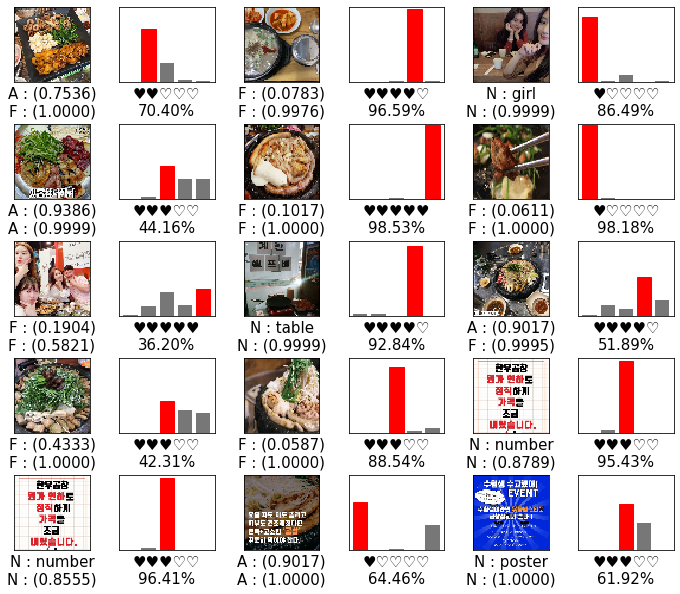

In [22]:
import matplotlib.pyplot as plt
def plot_image(i, predictions_array, predictions2_array, true_label, imag):
    predictions_array, imag = predictions_array[i], imag[i]
    predictions2_array = predictions2_array[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    b,g,r = cv2.split(imag)
    imag = cv2.merge([r,g,b])
    plt.imshow(imag,cmap=plt.cm.binary)
    plt.xlabel(print1[i]+"\n"+print2[i]+" : ({:0.4f})".format(np.max(predictions2_array)))
        
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(5), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    plt.xlabel(print3[i]+"\n{:2.2f}%".format(100*np.max(predictions_array)))


num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, predictions2, categories, test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test)
plt.subplots_adjust(hspace=.55)
plt.rc('font', size=15) 
plt.savefig('result1234.jpg')
plt.show()

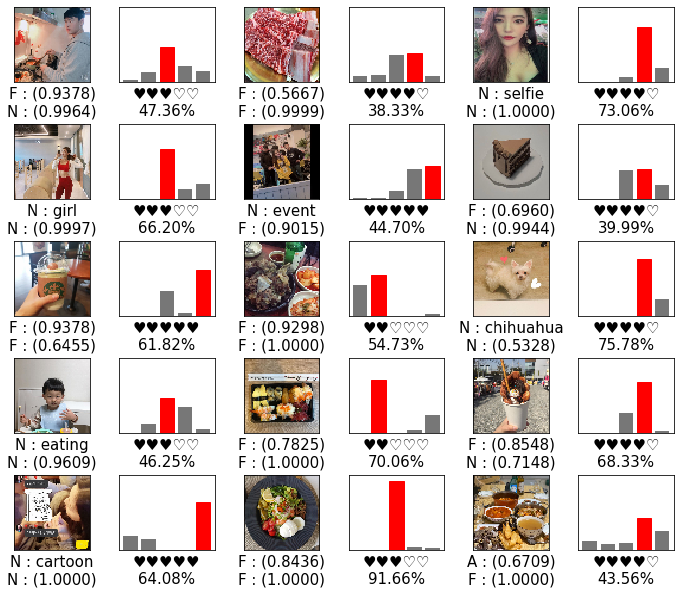

In [17]:
#통합

findname = "존마탱"

#기본 함수
import urllib.request
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import pandas as pd
import time
import os

#기본데이터
foodOlist = pd.read_csv('foodOlist.csv', header = None)
foodXlist = pd.read_csv('foodXlist.csv', header = None)
imgadvX = pd.read_csv('imgadvX.csv', header = None)
imgadvX = imgadvX[0].values.tolist()
imgadvO = pd.read_csv('imgadvO.csv', header = None)
imgadvO = imgadvO[0].values.tolist()





path_dir = 'image/intest/'
file_list = os.listdir(path_dir)
for i in range(0,len(file_list)):
    os.remove(path_dir+file_list[i])




headers = {'User-Agent':'Chrome/66.0.3359.181'}
url = 'https://www.instagram.com/explore/tags/'+str(findname)
driver = webdriver.Chrome('chromedriver2.exe')
driver.get(url)
filenum = 0
filesrc = []

time.sleep(5)
body = driver.find_element_by_xpath('/html/body')
driver.find_elements_by_xpath("//div[contains(@class,'_9AhH0')]")[0].click()
time.sleep(1)

url2 = driver.current_url
driver2 = webdriver.Chrome('chromedriver2.exe')
driver2.get(url2)
html = driver2.page_source

src = re.findall('www.instagram.com\/p\/(.*?)\/', str(url2))
if str(src).replace("'",'').replace("]","").replace("[","") not in filesrc:
    bsObject = BeautifulSoup(html, "lxml")
    picsrc = re.findall('srcset=\"https(.*?) ', str(bsObject))
    if len(picsrc) != 0:
        picsrc = 'https' + picsrc[0].replace('&amp;','&')
    if len(picsrc) != 0:

        filesrc.append(str(src).replace('"','').replace("'",'').replace("]","").replace("[",""))
        gpicsrc = str(picsrc).replace('&','%26').replace('=','%3D').replace('?','%3F').replace(':','%3A').replace('/','%2F')
        driver2.get('https://www.google.no/searchbyimage?image_url='+str(gpicsrc)+'&encoded_image=&image_content=&filename=&hl=ko')
        time.sleep(0.5)
        html2 = driver2.page_source
        bsObject2 = BeautifulSoup(html2, "lxml")
        k = re.findall('title=\"검색\" type=\"text\" value=\"(.*?)\"\/\>\<\/div\>', str(bsObject2))
        l=str(k).split(',')
        l = str(filenum).zfill(5) + '_' + l[0].replace("'",'').replace("]","").replace("[","").replace(" ","") +'_' + str(src).replace("'",'').replace("]","").replace("[","")
        ur = "image/intest/"+str(l.replace('"','').replace("'",'').replace("[","").replace(" ",""))+".jpg"
        urllib.request.urlretrieve(str(picsrc).replace('"','').replace("'",''), ur)
        filenum+=1

pgnum = 50
while  pgnum:
    pgnum-=1
    body.send_keys(Keys.RIGHT)
    time.sleep(1)
    url2 = driver.current_url
    driver2.get(url2)
    html = driver2.page_source
    src = re.findall('www.instagram.com\/p\/(.*?)\/', str(url2))
    if str(src).replace("'",'').replace("]","").replace("[","") not in filesrc:
        bsObject = BeautifulSoup(html, "lxml")
        picsrc = re.findall('srcset=\"https(.*?) ', str(bsObject))
        if len(picsrc) != 0:
            picsrc = 'https' + picsrc[0].replace('&amp;','&')
        if len(picsrc) != 0:

            filesrc.append(str(src).replace('"','').replace("'",'').replace("]","").replace("[",""))
            gpicsrc = str(picsrc).replace('&','%26').replace('=','%3D').replace('?','%3F').replace(':','%3A').replace('/','%2F')
            driver2.get('https://www.google.no/searchbyimage?image_url='+str(gpicsrc)+'&encoded_image=&image_content=&filename=&hl=ko')
            time.sleep(0.5)
            html2 = driver2.page_source
            bsObject2 = BeautifulSoup(html2, "lxml")
            k = re.findall('title=\"검색\" type=\"text\" value=\"(.*?)\"\/\>\<\/div\>', str(bsObject2))
            l=str(k).split(',')
            l = str(filenum).zfill(5) + '_' + l[0].replace("'",'').replace("]","").replace("[","").replace(" ","") +'_' + str(src).replace("'",'').replace("]","").replace("[","")
            ur = "image/intest/"+str(l.replace('"','').replace("'",'').replace("[","").replace(" ",""))+".jpg"
            urllib.request.urlretrieve(str(picsrc).replace('"','').replace("'",''), ur)
            filenum+=1
    if filenum >= 15:
        break

driver2.close()
driver.close()


#인스타 점수 평가

#기본함수
import os, re, glob
import cv2
import numpy as np
import shutil
from numpy import argmax
from keras.models import load_model


print1 = []
print2 = []
print3 = []

#사진속 넓이 반환 함수
import cv2
import os
import numpy as np
from  PIL import Image

class Recognition:
     def ExtractNumber(self, src):
        try:
            img=cv2.imdecode(np.fromfile(src, np.uint8), cv2.IMREAD_UNCHANGED)
            img2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            blur = cv2.GaussianBlur(img2,(3,3),0)
            canny=cv2.Canny(blur,5,800)
            contours, hierarchy  = cv2.findContours(canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
            box1=[]
            sumarea = 0  
            for i in range(len(contours)):
                cnt=contours[i]   
                area = cv2.contourArea(cnt)
                x,y,w,h = cv2.boundingRect(cnt)
                rect_area=w*h  #area size
                aspect_ratio = float(w)/h # ratio = width/height
                if  (rect_area>=9)and(rect_area<=2550): 
                    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),1)
                    sumarea += w*h
                    box1.append(cv2.boundingRect(cnt))
            return sumarea
        except:
            return -1

#최소편집 알고리즘
def edit_distance(s1, s2):
    l1, l2 = len(s1), len(s2)
    if l2 > l1:
        return edit_distance(s2, s1)
    if l2 is 0:
        return l1
    prev_row = list(range(l2 + 1))
    current_row = [0] * (l2 + 1)
    for i, c1 in enumerate(s1):
        current_row[0] = i + 1
        for j, c2 in enumerate(s2):
            d_ins = current_row[j] + 1
            d_del = prev_row[j + 1] + 1
            d_sub = prev_row[j] + (1 if c1 != c2 else 0)
            current_row[j + 1] = min(d_ins, d_del, d_sub)
        prev_row[:] = current_row[:]
    return prev_row[-1]

#파일 이름을 통해 음식인지 아닌지 확인
path_dir = 'image/intest'
intestname = []
file_list = os.listdir(path_dir)
for i in range(0,len(file_list)):
    intestname.append(file_list[i].split('_')[1])
    
for j in range(0,len(file_list)):
    word = intestname[j]
    wordtype = 0
    wordlen = 9999
    for i in range(0,len(foodOlist)):
        if wordlen > edit_distance(word,str(foodOlist[0][i])):
            wordlen = edit_distance(word,str(foodOlist[0][i]))
            wordsim = str(foodOlist[0][i])
            wordtype = 1
    for i in range(0,len(foodXlist)):
        if wordlen > edit_distance(word,str(foodXlist[0][i])):
            wordlen = edit_distance(word,str(foodXlist[0][i]))
            wordsim = str(foodXlist[0][i])
            wordtype = 2
    #음식이라면 광고확률을 출력해서 평가
    if wordtype == 1:
        recogtest=Recognition()
        result=recogtest.ExtractNumber('image/intest/'+str(file_list[j]))
        if result!=-1:
            ac = 1
            bc = 1
            for j in range(0,len(imgadvO)):
                if (result <= imgadvO[j]+100)and(result >= imgadvO[j]-50):
                    ac+=1
            for j in range(0,len(imgadvX)):
                if (result <= imgadvX[j]+100)and(result >= imgadvX[j]-50):
                    bc+=1
            if (ac/a)/(ac/a+bc/b)>=0.5:
                print1.append("A : ({:.4f})".format((ac/a)/(ac/a+bc/b)))
#                 print("광고 O : 불일치도(",wordlen,") 비슷한단어 : ",wordsim,"({:.4f})".format((ac/a)/(ac/a+bc/b)))
            else:        
                print1.append("F : ({:.4f})".format(1-(ac/a)/(ac/a+bc/b)))
#                 print("광고 X : 불일치도(",wordlen,") 비슷한단어 : ",wordsim,"({:.4f})".format((ac/a)/(ac/a+bc/b)))
        else:
            print1.append("Error")
    elif wordtype == 2:
        print1.append("N : "+wordsim)
#         print("음식X : 불일치도(",wordlen,") 비슷한단어 : ",wordsim)
    else:
        print("Error")



#CNN을 통해 분류한결과 출력 (음식X : N, 음식:F, 광고:A)
def Dataization(img_path):
    image_w = 64
    image_h = 64
    img = cv2.imdecode(np.fromfile(img_path, np.uint8), cv2.IMREAD_UNCHANGED)
    img = cv2.resize(img, dsize=(64,64))
    return (img/256)

categories = ["A", "F", "N"]

src = []
name = []
test = []

model = load_model('food_cnn.h5')

for file in os.listdir('image/intest'):
    if (file.find('.jpg') is not -1):      
        src.append('image/intest/' + file)
        name.append(file)
        test.append(Dataization('image/intest/' + file))
        
test = np.array(test)
predict = model.predict_classes(test)
predictions2 = model.predict(test)

for i in range(len(test)):
    print2.append(str(categories[predict[i]]))
#     print(name[i] + " : , Predict : "+ str(categories[predict[i]]))


#CNN을 통해 좋아요 분류해 ♥로 출력
categories = ["♥♡♡♡♡","♥♥♡♡♡","♥♥♥♡♡","♥♥♥♥♡","♥♥♥♥♥"]
 
src = []
name = []
test = []

model = load_model('like_cnn1000.h5')

for file in os.listdir('image/intest'):
    if (file.find('.jpg') is not -1):      
        src.append('image/intest/' + file)
        name.append(file)
        test.append(Dataization('image/intest/' + file))
        
test = np.array(test)
predict = model.predict_classes(test)
predictions = model.predict(test)
 
for i in range(len(test)):
    print3.append(str(categories[predict[i]]))
#     print(name[i] + " : , Predict : "+ str(categories[predict[i]]))



import matplotlib.pyplot as plt
def plot_image(i, predictions_array, predictions2_array, true_label, imag):
    predictions_array, imag = predictions_array[i], imag[i]
    predictions2_array = predictions2_array[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    b,g,r = cv2.split(imag)
    imag = cv2.merge([r,g,b])
    plt.imshow(imag,cmap=plt.cm.binary)
    plt.xlabel(print1[i]+"\n"+print2[i]+" : ({:0.4f})".format(np.max(predictions2_array)))
        
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(5), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    plt.xlabel(print3[i]+"\n{:2.2f}%".format(100*np.max(predictions_array)))


num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, predictions2, categories, test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test)
plt.subplots_adjust(hspace=.55)
plt.rc('font', size=15) 
plt.savefig('result-'+str(findname)+'.jpg')
plt.show()